### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_l, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [2]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [150.0, 0.097836, 0.00682578, 0.00958013, 0.00503788, 0.0433964, 38.941, 9.94827, 0.00294624, 0.0222821]
# max num of steps
num_steps=10000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)

global optimization begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.04 secs, 313 evals, 220 steps, improv/step: 0.391 (last = 0.3909), fitness=26829.153226714
100.08 secs, 631 evals, 525 steps, improv/step: 0.373 (last = 0.3607), fitness=26208.511273910
150.23 secs, 947 evals, 846 steps, improv/step: 0.338 (last = 0.2804), fitness=23971.721454619
200.31 secs, 1266 evals, 1168 steps, improv/step: 0.306 (last = 0.2205), fitness=19939.751224996
250.38 secs, 1591 evals, 1495 steps, improv/step: 0.273 (last = 0.1560), fitness=16663.861841446
300.52 secs, 1915 evals, 1823 steps, improv/step: 0.256 (last = 0.1768), fitness=15051.267495665
350.56 secs, 2236 evals, 2149 steps, improv/step: 0.251 (last = 0.2270), fitness=14264.889021930
400.71 secs, 2561 evals, 2479 steps, improv/step: 0.240 (last = 0.1636), fitness=13728.259950036

(12052.520141642934, [50.011073703420855, 0.01, 0.010085490910385086, 0.07617710222434908, 0.0455057349524897, 0.02294878177947854, 39.99428131556058, 5.016187582553807, 0.007039934075721195, 0.004249265630857707])

### Plot the data with the new set of parameters for DDE

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/importData.jl:37
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol) at plot.jl:30
└ @ Main /home/farnazm/dde/dde-cons/DrugResponseModel.jl/src/plot.jl:30
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{F

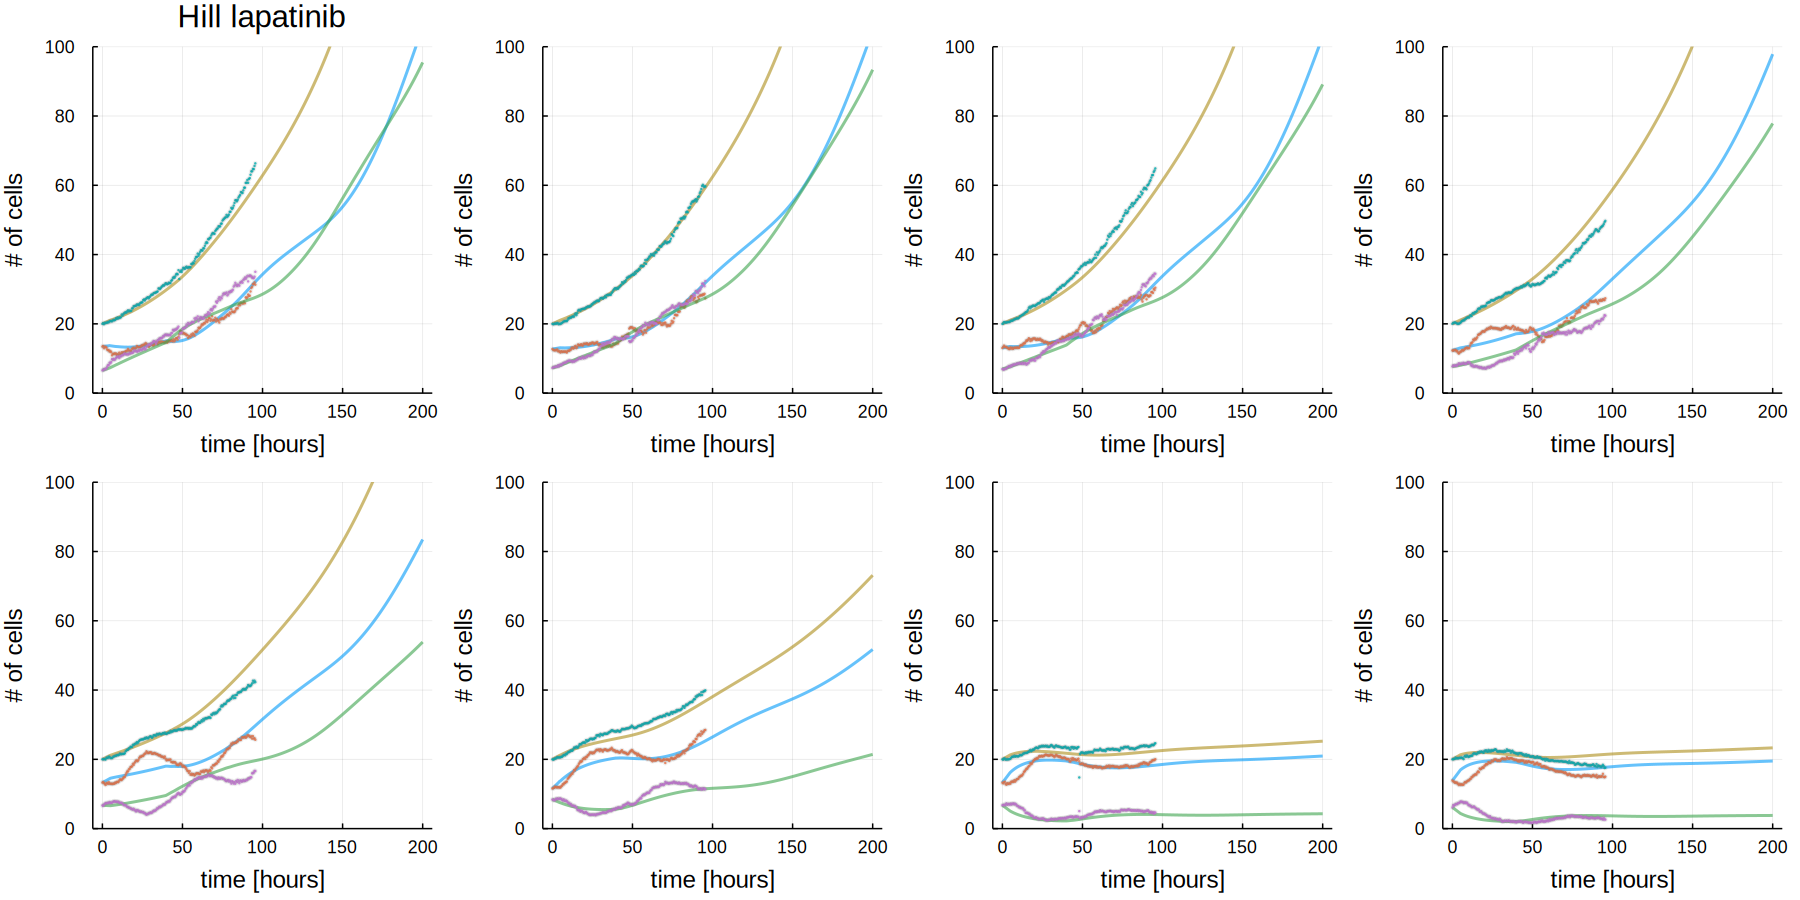

In [5]:
# easy way to convert the hill parameters to DDE parameters
include("plot.jl")
p = getDDEparams(params, conc_l)
# i showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
p_1 = plotIt(p[:, 1], 1, "Hill lapatinib", :left)
p_2 = plotIt(p[:, 2], 2, "", :false)
p_3 = plotIt(p[:, 3], 3, "", :false)
p_4 = plotIt(p[:, 4], 4, "", :false)
p_5 = plotIt(p[:, 5], 5, "", :false)
p_6 = plotIt(p[:, 6], 6, "", :false)
p_7 = plotIt(p[:, 7], 7, "", :false)
p_8 = plotIt(p[:, 8], 8, "", :false)
plot(p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, layout = (2,4))
plot!(size = (1200, 600))
ylims!((0.0, 100.0))

### Plot Hill curve for all of the DDE model parameters

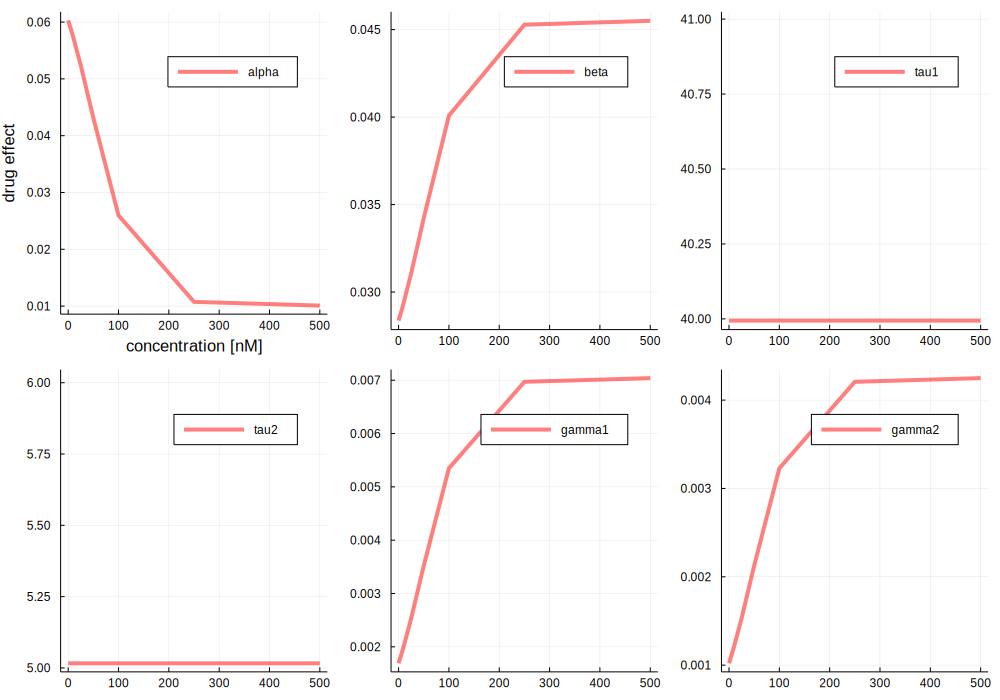

In [4]:
# plot
p__1 = plot(conc_l, p[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect", line = (0.5, 4, :red))
p__2 = plot(conc_l, p[2, :], label = "beta", linewidth = 2, legend =:best, line = (0.5, 4, :red))
p__3 = plot(conc_l, p[3, :], label = "tau1", linewidth = 2, line = (0.5, 4, :red))
p__4 = plot(conc_l, p[4, :], label = "tau2", linewidth = 2, line = (0.5, 4, :red))
p__5 = plot(conc_l, p[5, :], label = "gamma1", linewidth = 2, line = (0.5, 4, :red))
p__6 = plot(conc_l, p[6, :], label = "gamma2", linewidth = 2, line = (0.5, 4, :red))
plot(p__1, p__2, p__3, p__4, p__5, p__6)
plot!(size = (1000, 700))